In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier,plot_tree
from  mlxtend.plotting import plot_decision_regions
from sklearn.base import BaseEstimator, ClassifierMixin


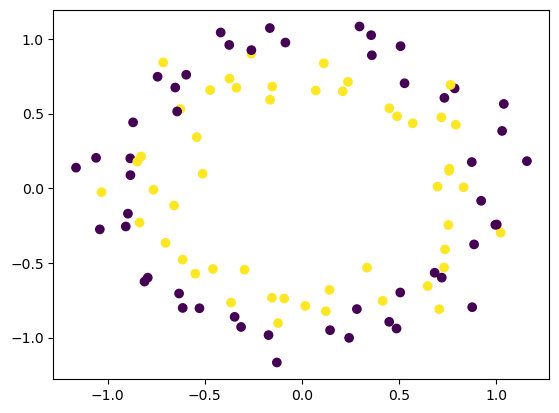

In [123]:
x,y = make_circles(n_samples=100,noise=.1,random_state=42)
plt.scatter(x[:,0],x[:,1],c=y)

In [124]:
# plt.scatter(x[:,0],x[:,1],c=y)

In [189]:
class myalgo(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)       # <-- important for plot_decision_regions
        self.n_features_in_ = X.shape[1]   # <-- required for sklearn compatibility

        n_samples = len(y)
        weight = np.ones(n_samples) / n_samples
        self.alphas = []
        self.models = []

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=weight)
            y_pred = model.predict(X)
            alpha = 0.5 * np.log((1 - np.sum(weight*(y != y_pred))) / (np.sum(weight*(y != y_pred)) + 1e-10))
            weight = weight * np.exp(-alpha * (2*(y == y_pred) - 1))
            weight /= weight.sum()

            self.alphas.append(alpha)
            self.models.append(model)
        return self

    def predict(self, X):
        total = np.zeros(len(X))
        for alpha, model in zip(self.alphas, self.models):
            pred = model.predict(X)
            pred = np.where(pred==0, -1, 1)
            total += alpha * pred
        return np.where(np.sign(total)==-1, 0, 1)
    # def __init__(self,n_estimators=50) -> None:
    #     self.alpha = []
    #     self.model = []
    #     self.n_estimators=n_estimators
    #     pass
    # def fit(self,x,y):
    #     self.classes_ = np.unique(y)
    #     self.n_features_in_ = x.shape[1]
    #     def get_error(weight, y, y_pred):
    #         return np.sum(weight * (y != y_pred))

    #     def get_alpha(weight, y, y_pred):
    #         err = get_error(weight, y, y_pred)
            
    #         return 0.5 * np.log((1 - err) / (err + 1e-10))

    #     def get_updated_weights(weight, y, y_pred, alpha):
    #         w_new = weight * np.exp(-alpha * (2 * (y == y_pred) - 1))
    #         return w_new / np.sum(w_new)

        
    #     n_samples = len(y)
    #     weight = np.ones(n_samples) / n_samples
    #     alphas, models = [], []

    #     for t in range(self.n_estimators):
        
    #         dt = DecisionTreeClassifier(max_depth=1)
    #         dt.fit(x, y, sample_weight=weight)

        
    #         y_pred = dt.predict(x)
           
    #         alpha = get_alpha(weight, y, y_pred)
    #         weight = get_updated_weights(weight, y, y_pred, alpha)
            
    #         alphas.append(alpha)
    #         models.append(dt)

    #     self.alpha,self.model = alphas, models
    #     # print("Succesful_fit")
    #     return self
    # def predict(self,x):
    #     alpha = self.alpha
    #     models = self.model
    #     y_pred = []
    #     for i in x:
    #         total = 0
    #         for a, d in zip(alpha, models):
    #             pred = d.predict(i.reshape(1, -1))
    #             total += a * (-1 if pred == 0 else 1)
    #         y_pred.append(0 if np.sign(total) == -1 else 1)
    #     return y_pred
                 

# len(x)  

In [227]:
my = myalgo(45)

In [228]:
from sklearn.metrics import accuracy_score


my.fit(x,y)
accuracy_score(y,my.predict(x))
# plot_decision_regions(x,y,my)
# plt.show()

0.86

In [229]:
from sklearn.ensemble import AdaBoostClassifier


a = AdaBoostClassifier(n_estimators=10)
a.fit(x,y)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

<Axes: >

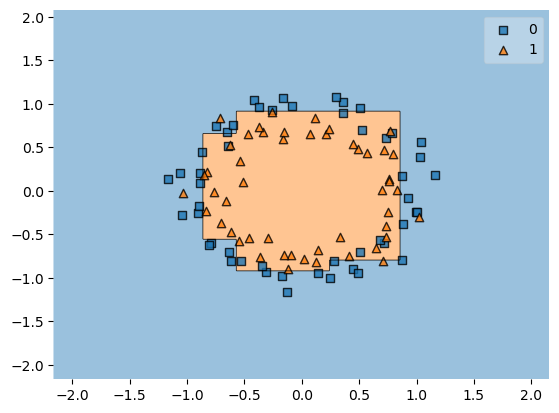

In [230]:
accuracy_score(y,a.predict(x))
plot_decision_regions(x,y,my)

<Axes: >

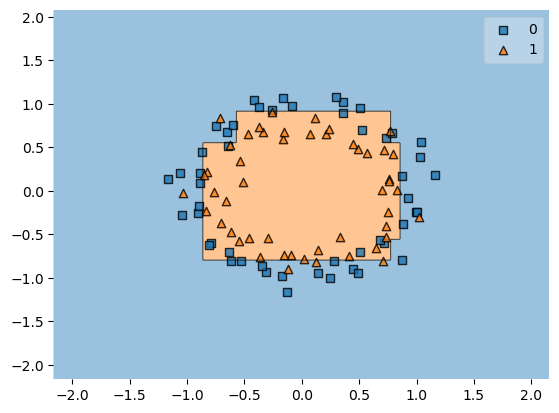

In [231]:
plot_decision_regions(x,y,a)